In [1]:
#conda install -c conda-forge kneed

In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from pandas import DataFrame
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

In [3]:
features, true_labels = make_moons(
         n_samples=200, noise =0.1)

In [4]:
features[:5]

array([[-0.31936552,  1.05271328],
       [ 0.89695513,  0.50978543],
       [-0.03361049,  0.15028188],
       [-1.00233361,  0.0577511 ],
       [ 0.81259853,  0.71173057]])

In [5]:
true_labels[:5]

array([0, 0, 1, 0, 0], dtype=int64)

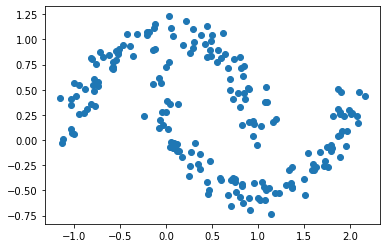

In [6]:
plt.scatter(features[:,0], features[:,1])

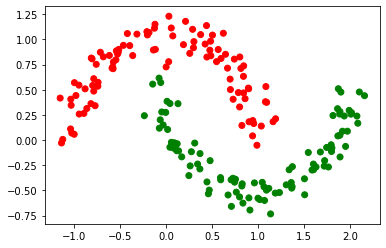

In [7]:
LABEL_COLOR_MAP = {0:'r', 1:'g'}

label_color = [LABEL_COLOR_MAP[l] for l in true_labels]
plt.scatter(features[:,0], features[:,1], c=label_color)

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
scaled_features[:5]

array([[-0.92275688,  1.52096053],
       [ 0.45356018,  0.47804249],
       [-0.59941326, -0.21253313],
       [-1.69556349, -0.39027685],
       [ 0.3581072 ,  0.86596186]])

In [10]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42 )

In [11]:
kmeans.fit(scaled_features)

KMeans(n_clusters=2, random_state=42)

In [12]:
label = kmeans.fit_predict(scaled_features)
label

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0])

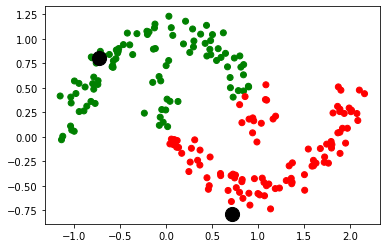

In [13]:
centers = np.array(kmeans.cluster_centers_)
LABEL_COLOR_MAP = {0:'g', 1:'r'}

label_color = [LABEL_COLOR_MAP[l] for l in label]
plt.scatter(features[:,0], features[:,1], c=label_color)


plt.scatter(centers[:,0], centers[:,1], marker="o", color='k', s=200)

In [14]:
# to locate the centroids of the clusters
kmeans.cluster_centers_

array([[-0.73331918,  0.80076126],
       [ 0.71879801, -0.7849046 ]])

In [15]:
#the lowest SSE values
kmeans.inertia_

168.87408776686223

In [16]:
# Number of iterations required to converge
kmeans.n_iter_

6

In [17]:
kmeans.labels_[:20]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [18]:
average_precision = average_precision_score(kmeans.labels_, true_labels)
average_precision
accuracy_score(kmeans.labels_, true_labels)

0.865

In [19]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0])

In [20]:
true_labels

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0], dtype=int64)